In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [137]:
df = pd.read_excel("Election_Data.xlsx")

In [138]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [139]:
df = df.drop('Unnamed: 0',axis=1)

In [140]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [141]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [142]:
# Describing the data
df.describe(include='all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [144]:
df.shape

(1525, 9)

In [145]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [146]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [147]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [148]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [149]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [150]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


In [151]:
# Univariate Analysis

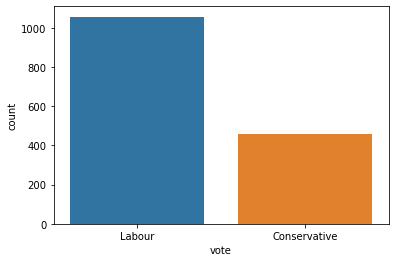

In [152]:
sns.countplot(x='vote', data=df)

In [153]:
# Vote is the target variable.The above plot describes the number of candidates who vote for labour is more than the conservative party

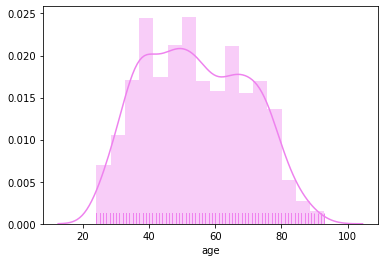

In [154]:
sns.distplot(df['age'],color = 'violet', rug=True)

In [155]:
# Age: The above plot describes the age group of the candidates who vote.

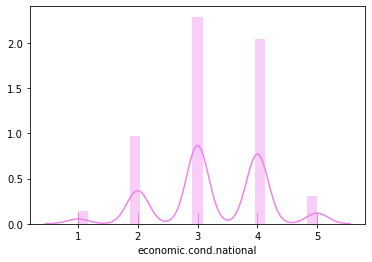

In [156]:
sns.distplot(df['economic.cond.national'],color = 'violet', rug=True)

In [157]:
# economic.cond.national: The above plot describes the economic condition of the nation which falls between 1-5

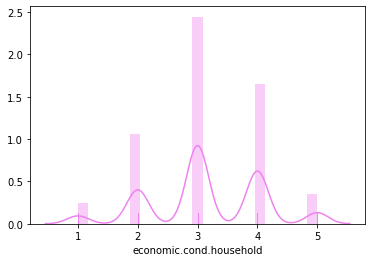

In [158]:
sns.distplot(df['economic.cond.household'],color = 'violet', rug=True)

In [159]:
# economic.cond.household: The above plot describes the economic condition of household,which also falls between scale 1-5.

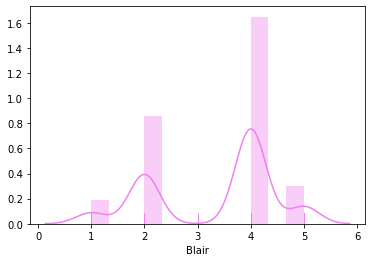

In [160]:
sns.distplot(df['Blair'],color = 'violet', rug=True)

In [161]:
# Blair: It is the Assessment of the Labour leader on a scale 1-5

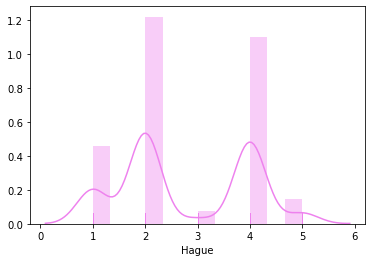

In [162]:
sns.distplot(df['Hague'],color = 'violet', rug=True)

In [163]:
# Hague: It belong to conservative party on sclae of 1-5

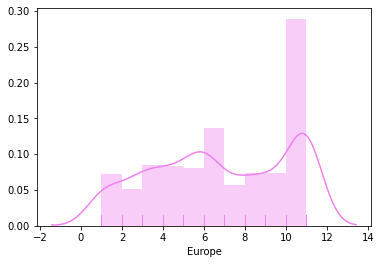

In [164]:
sns.distplot(df['Europe'],color = 'violet', rug=True)

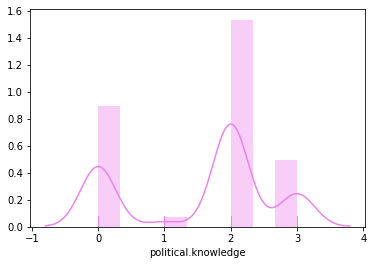

In [165]:
sns.distplot(df['political.knowledge'],color = 'violet', rug=True)

In [166]:
# # political.knowledge: The above plot describes the knowledge os party's position

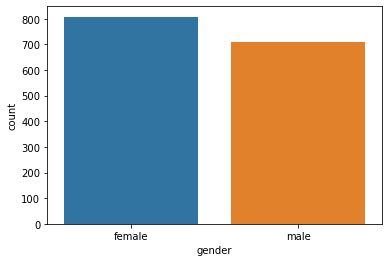

In [167]:
sns.countplot(x='gender', data = df)

In [168]:
# Gender: The above plot describes the number of female and male candidates who has voted for the parties

Text(0.5, 1.0, 'political knowledge boxplot')

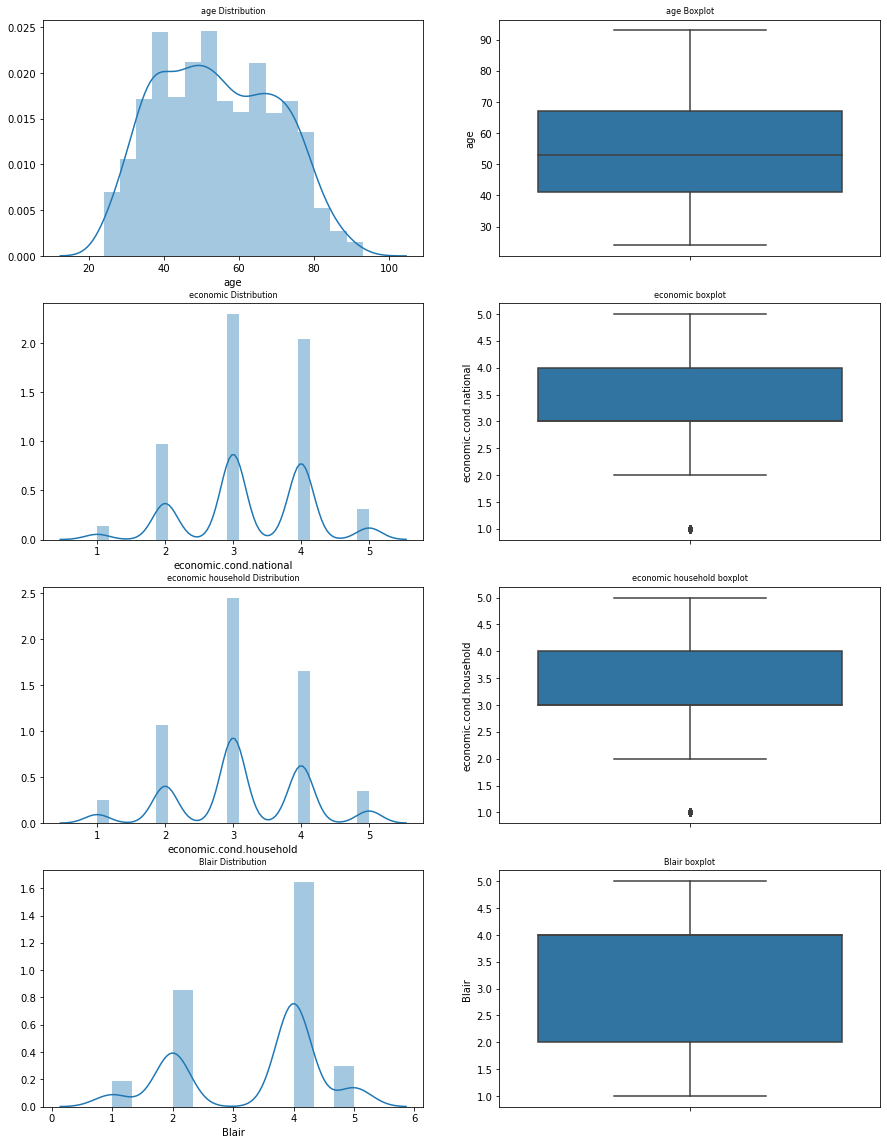

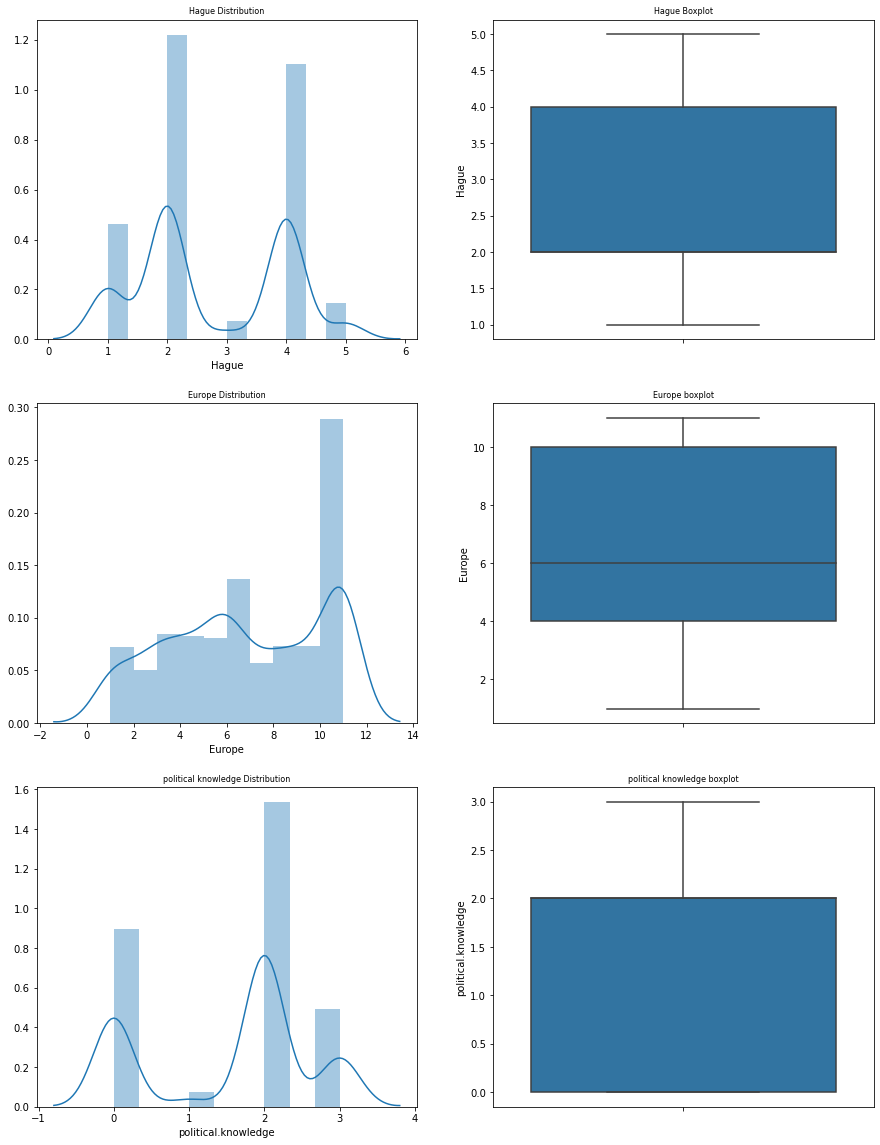

In [169]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=8)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=8)


a=sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=8)

a=sns.boxplot(df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=8)


a=sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=8)

a=sns.boxplot(df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=8)


a=sns.distplot(df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=8)

a=sns.boxplot(df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=8)


fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=8)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=8)


a=sns.distplot(df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=8)

a=sns.boxplot(df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=8)


a=sns.distplot(df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=8)

a=sns.boxplot(df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=8)

In [170]:
# Bivariate Analysis

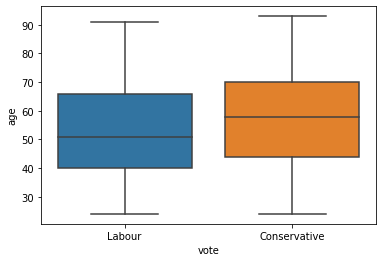

In [171]:
sns.boxplot(x='vote', y='age', data=df)

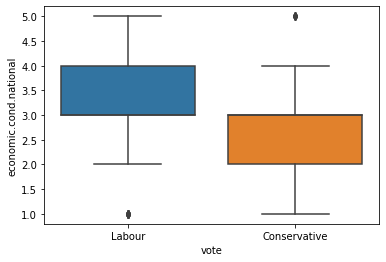

In [172]:
sns.boxplot(x='vote', y='economic.cond.national', data=df)

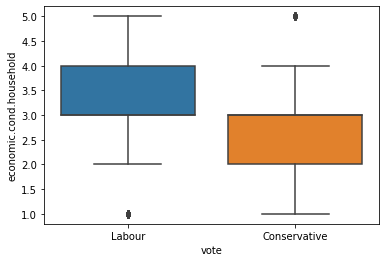

In [173]:
sns.boxplot(x='vote', y='economic.cond.household', data=df)

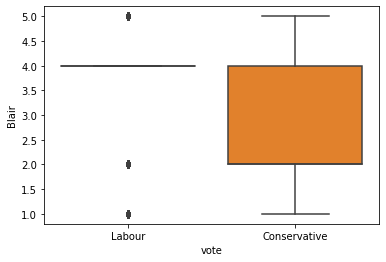

In [174]:
sns.boxplot(x='vote', y='Blair', data=df)

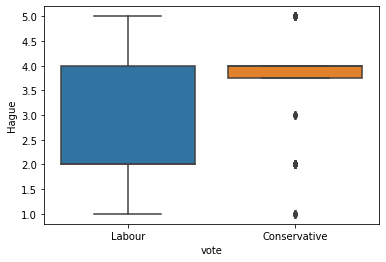

In [175]:
sns.boxplot(x='vote', y='Hague', data=df)

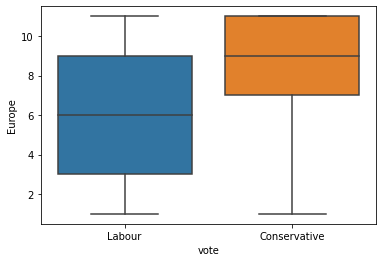

In [176]:
sns.boxplot(x='vote', y='Europe', data=df)

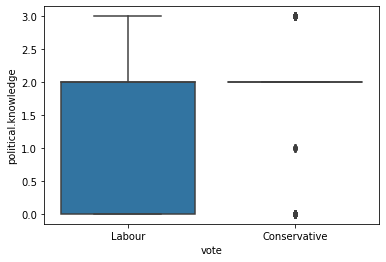

In [177]:
sns.boxplot(x='vote', y='political.knowledge', data=df)

In [178]:
# Data Distribution

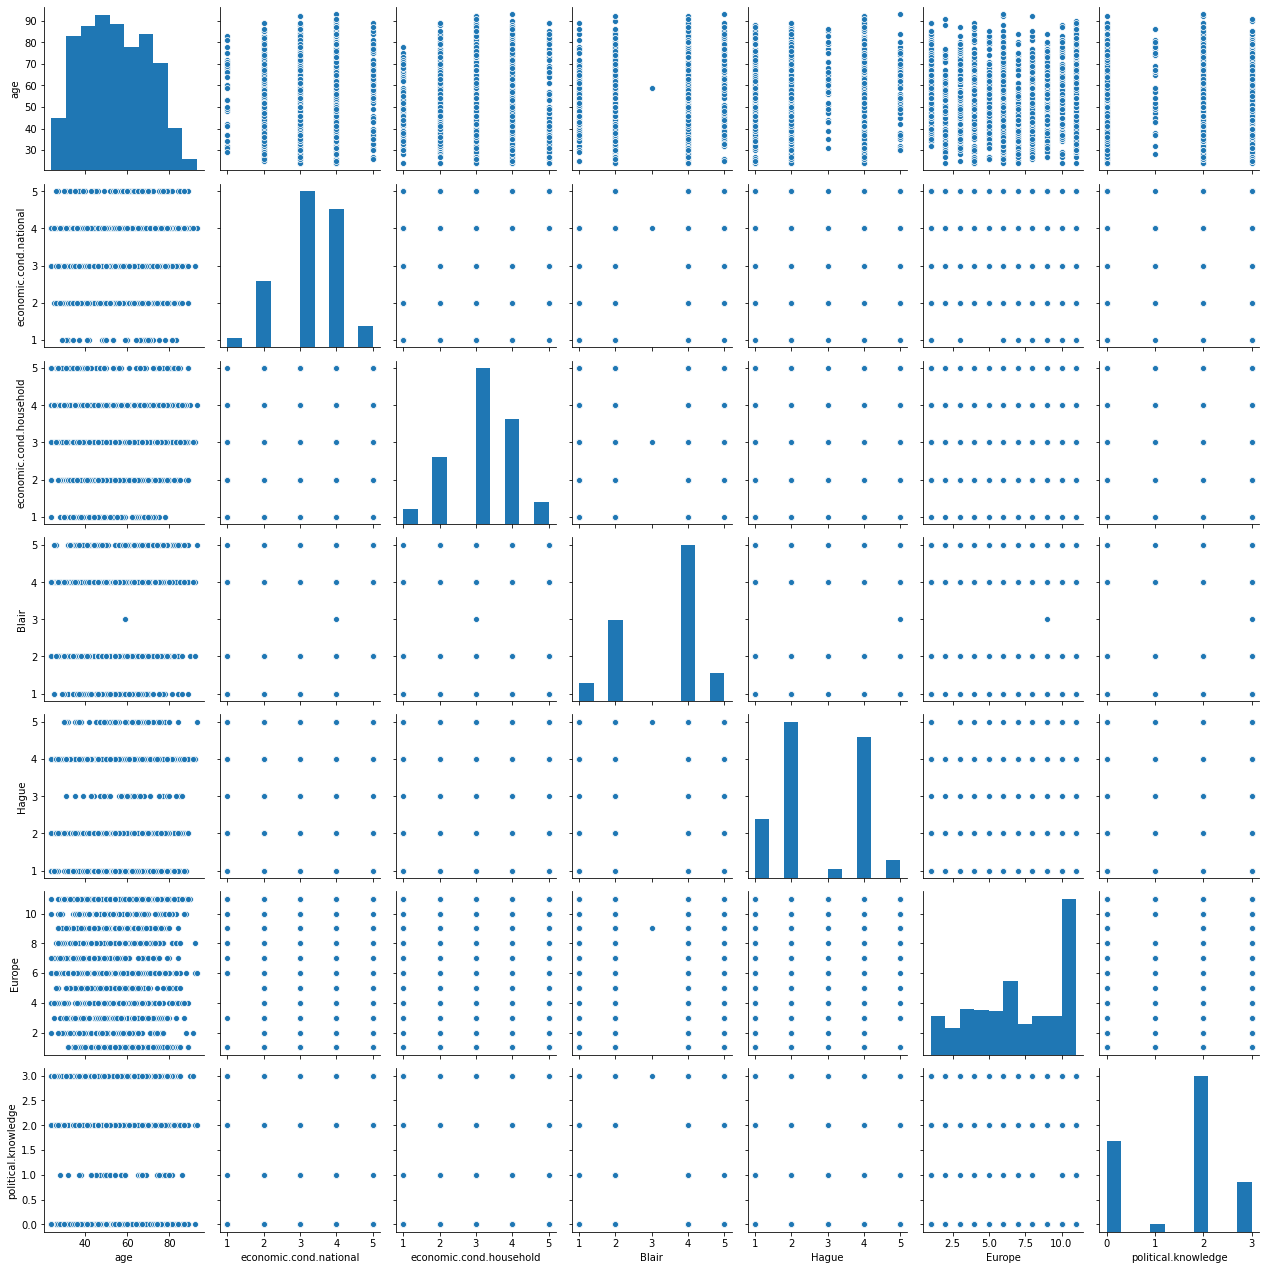

In [179]:
sns.pairplot(df)
plt.show()

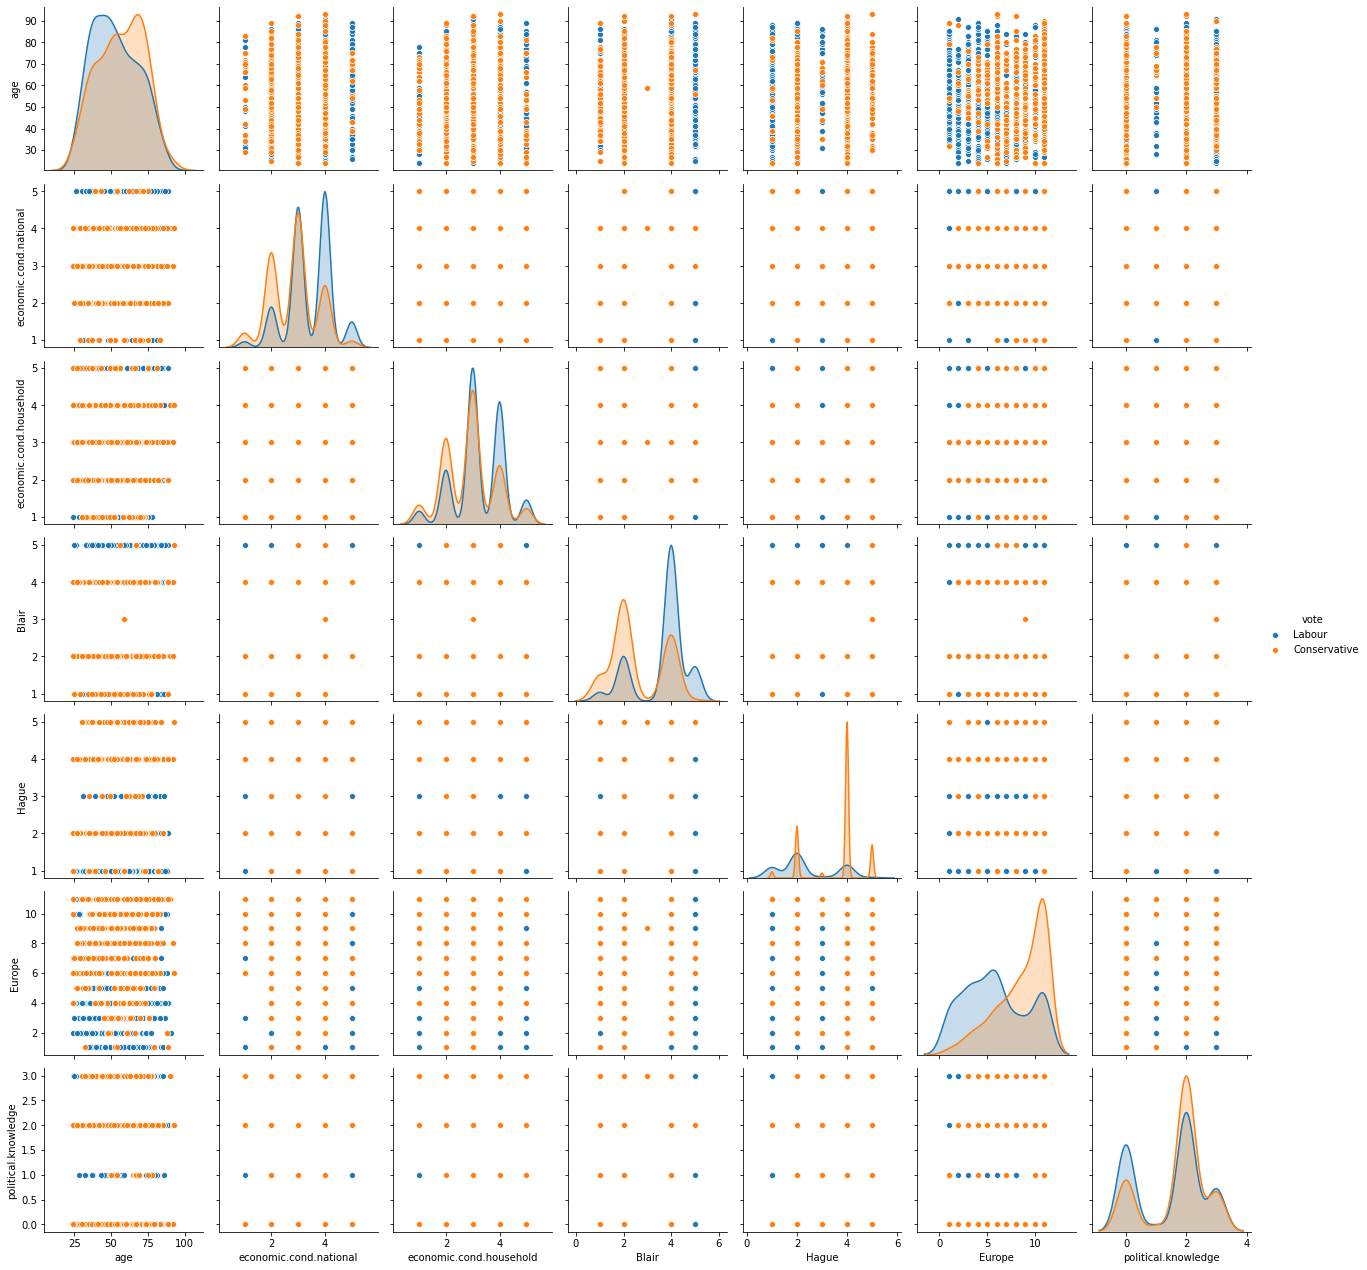

In [180]:
sns.pairplot(df, hue='vote')

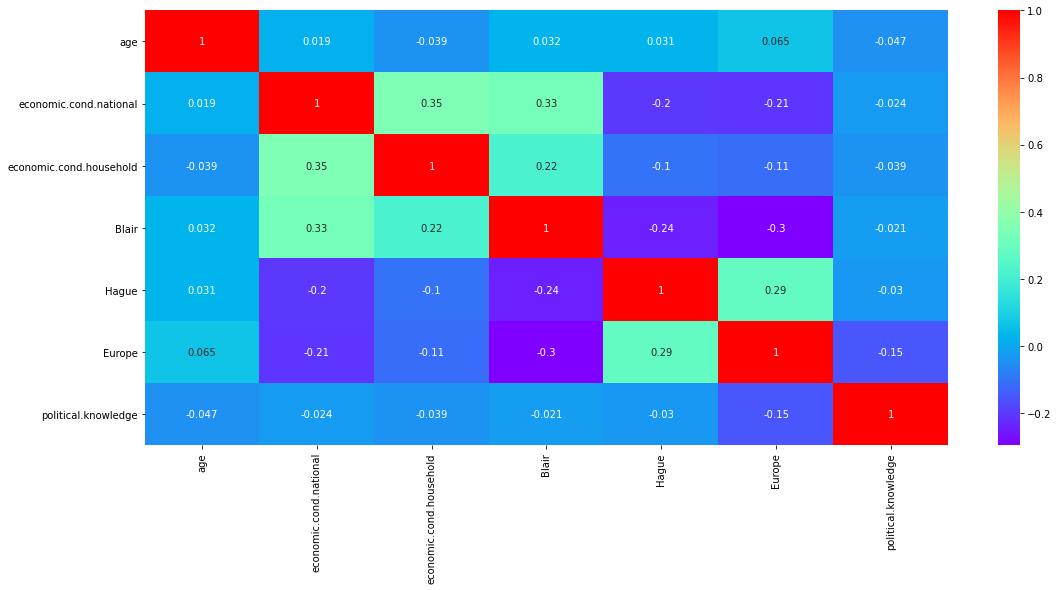

In [181]:
# Correlation

plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')
plt.show()

In [182]:
# Outliers Check

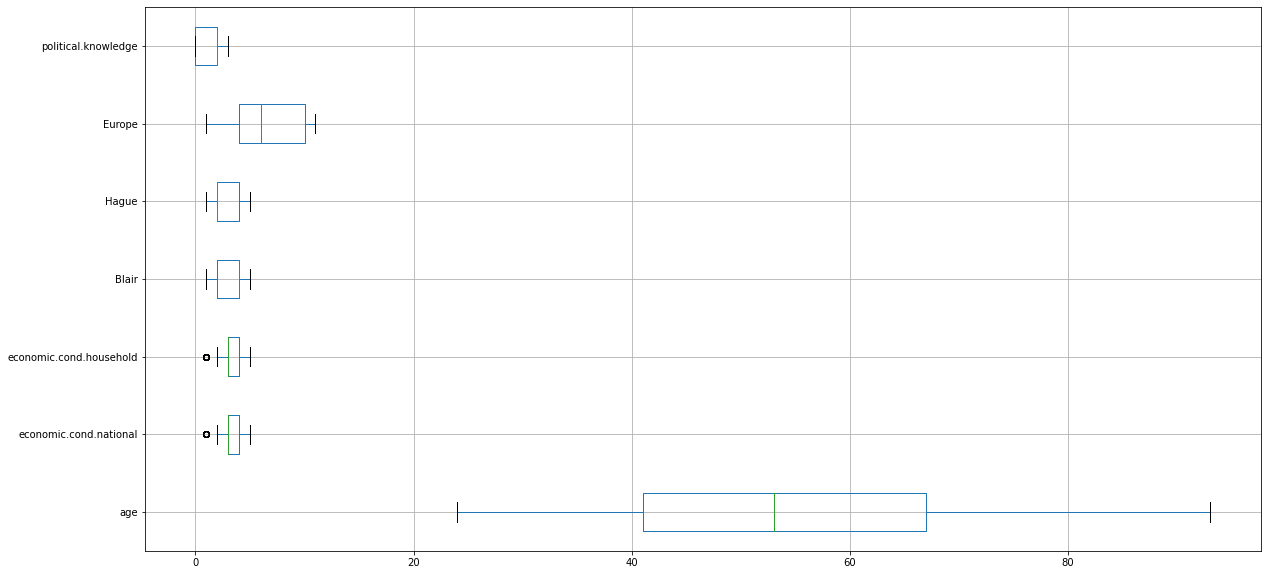

In [183]:
plt.figure(figsize=(20,10))
num = ['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

df[num].boxplot(vert=0)
plt.show()

In [184]:
# Treating Outliers
cols = ['economic.cond.national','economic.cond.household']

In [185]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [186]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

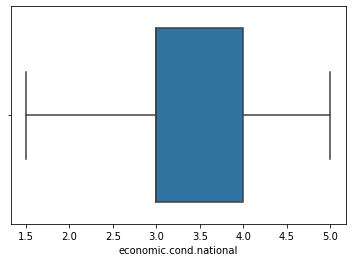

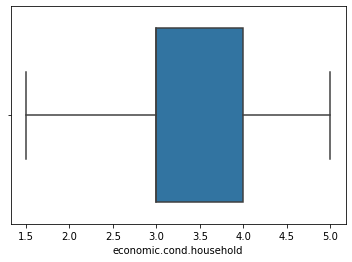

In [187]:
cols = ['economic.cond.national','economic.cond.household']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.257416,0.853647,1.5,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.159196,0.886279,1.5,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [189]:
categorical = ['vote', 'gender']

In [190]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [191]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [192]:
df.vote_Labour.value_counts()

1    1057
0     460
Name: vote_Labour, dtype: int64

In [193]:
# 1-Labour, 0-Conservative

In [194]:
df.gender_male.value_counts()

0    808
1    709
Name: gender_male, dtype: int64

In [195]:
# 1-Male, 0-Female

In [196]:
df = df.rename(columns={'vote_Labour':'IsLabour_or_not', 'gender_male':'IsMale_or_not'},inplace=False)

In [197]:
df.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
965,53,4.0,3.0,4,2,5,2,0,1
1176,59,4.0,3.0,2,4,8,2,0,0
336,31,4.0,4.0,4,1,6,3,1,1
938,59,1.5,4.0,2,4,11,0,0,1
734,29,4.0,3.0,4,2,4,2,1,1
1311,61,3.0,3.0,2,2,6,0,1,0
1197,33,2.0,2.0,4,2,5,3,1,0
918,74,4.0,3.0,4,2,7,1,1,0
275,49,3.0,3.0,2,2,8,0,0,0
561,46,3.0,4.0,4,1,2,0,1,1


In [198]:
# Scaling is not required

In [199]:
X=df.drop('IsLabour_or_not',axis=1)
y=df.pop('IsLabour_or_not')

In [200]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

#### Logistic Regression Model

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
model = LogisticRegression(solver='newton-cg',max_iter=100,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    9.0s finished


LogisticRegression(n_jobs=2, penalty='none', solver='newton-cg', verbose=True)

#### Logistic Regression Predicting on Training and Test Data set

In [203]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

#### Getting the predicted classes and probs for Logistic Regression

In [204]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


#### Logistic Model Evaluation

In [205]:
# Accuracy on training data
model.score(X_train, y_train)

0.8341187558906692

In [206]:
# Accuracy on test data
model.score(X_test, y_test)

0.8289473684210527

#### AUC and ROC for the Logistic training data

AUC: 0.890


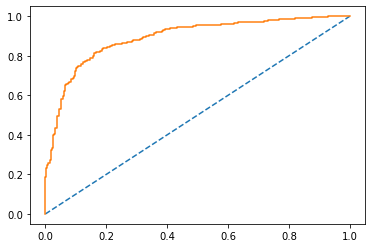

In [207]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC for the Logistic test data

AUC: 0.890


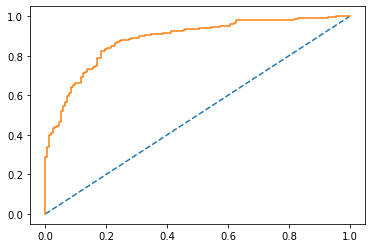

In [208]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the Logistic training data

In [209]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [210]:
confusion_matrix(y_train, ytrain_predict)

array([[197, 110],
       [ 66, 688]], dtype=int64)

C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


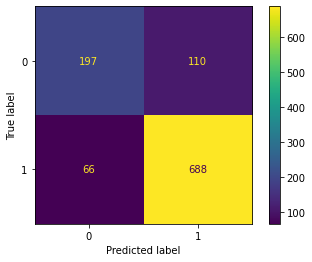

In [211]:
plot_confusion_matrix(model,X_train,y_train);

#### Confusion Matrix for the Logistic test data

In [212]:
confusion_matrix(y_test, ytest_predict)

array([[111,  42],
       [ 36, 267]], dtype=int64)

C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


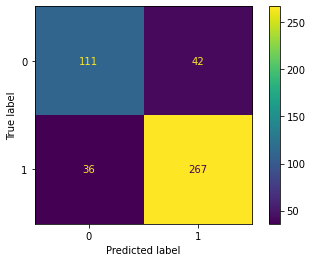

In [213]:
plot_confusion_matrix(model,X_test,y_test);

#### Classification Report on Logistic train data

In [214]:
from sklearn.metrics import classification_report

In [215]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



#### Classification Report on the Logistic test data

In [216]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



#### Applying GridSearchCV for Logistic Regression

In [217]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.01,0.001]}

In [218]:
model = LogisticRegression(max_iter=1000,n_jobs=2)

In [219]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 2,n_jobs=-1,scoring='f1')

In [220]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [221]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.01} 

LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', tol=0.01)


In [222]:
best_model = grid_search.best_estimator_

In [223]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [224]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.426490,0.573510
1,0.151336,0.848664
2,0.006499,0.993501
3,0.842677,0.157323
4,0.063539,0.936461


In [225]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [226]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



###### Even applying grid search cv there is no much difference in scores, All the scoresand predictions are almost same.

#### LDA Model

In [227]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

###### Accuracy, Confusion matrix and Classification report on LDA train data

In [229]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


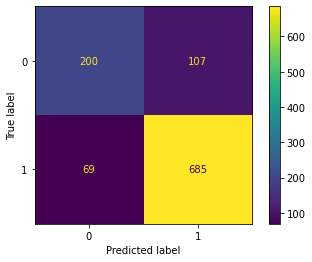

In [230]:
plot_confusion_matrix(LDA_model,X_train,y_train);

###### Accuracy, Confusion matrix and Classification report on LDA test data

In [231]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


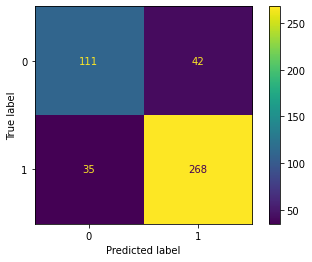

In [232]:
plot_confusion_matrix(LDA_model,X_test,y_test);

###### Auc and ROC for LDA train data

AUC: 0.890


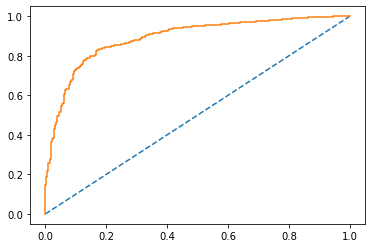

In [233]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

###### AUC and ROC for LDA test data

AUC: 0.888


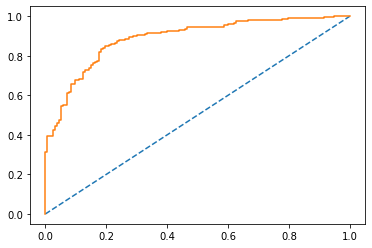

In [234]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

###### Applying Grid Search CV on LDA

In [235]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Accuracy: 0.893
Config: {'solver': 'svd'}


###### Next, we can explore whether using shrinkage with the model improves performance.

Shrinkage adds a penalty to the model that acts as a type of regularizer, reducing the complexity of the model.

In [236]:
# grid search shrinkage for lda
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Accuracy: 0.894
Config: {'shrinkage': 0.02}


###### As we can see in the above accuracy score using Grid Search CV for LDA does'nt effect the model performance.

#### Naive Bayes Model

In [237]:
from sklearn.naive_bayes import GaussianNB

In [238]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

###### Accuracy, Confusion Matrix and Classification report on NB train data

In [239]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


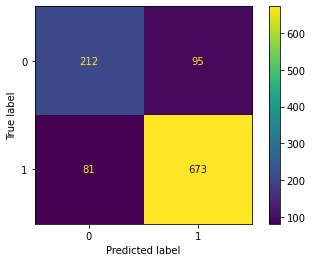

In [240]:
plot_confusion_matrix(NB_model,X_train,y_train);

###### Accuracy, Confusion matrix and Classification report on NB test data

In [241]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


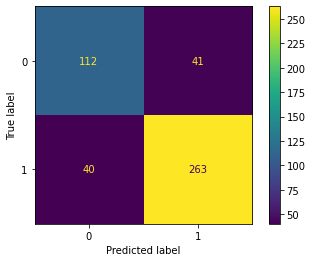

In [242]:
plot_confusion_matrix(NB_model,X_test,y_test);

###### AUC and ROC curve for NB train data

AUC: 0.889


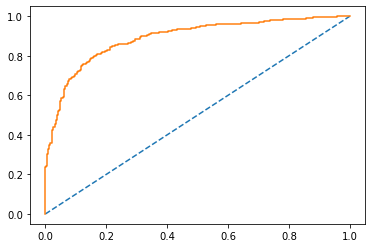

In [243]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

###### AUC and ROC curve for NB test data

AUC: 0.876


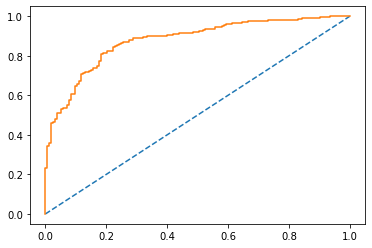

In [244]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

###### Applying Grid Search CV on Naive Bayes Model

In [245]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [246]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0012328467394420659)


In [247]:
from sklearn.metrics import accuracy_score
y_pred = nbModel_grid.predict(X_test)
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

0.8245614035087719 : is the accuracy score


###### From the above for Naive Bayes model also accuracy score remains same without or with using Grid search CV

#### KNN Model

In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train) #scaling the data since KNN is a distance based algorithm.
X_test_scaled=ss.transform(X_test)
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

###### Accuracy, Confusion Matrix and Classification report on KNN train data

In [249]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_scaled)
model_score = KNN_model.score(X_train_scaled, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8548539114043355
[[216  91]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


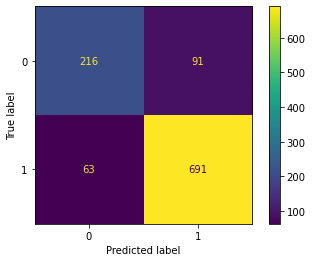

In [250]:
plot_confusion_matrix(KNN_model,X_train_scaled,y_train);

###### Accuracy, Confusion matrix and Classification report for KNN test data

In [251]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_scaled)
model_score = KNN_model.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[109  44]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


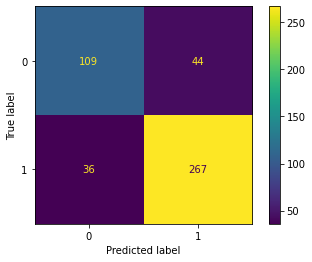

In [252]:
plot_confusion_matrix(KNN_model,X_test_scaled,y_test);

###### AUC and ROC curve for KNN train data

AUC: 0.929


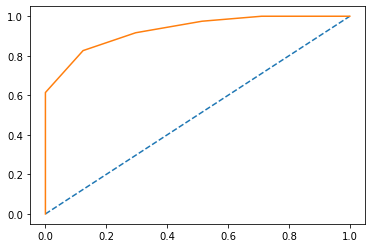

In [253]:
# predict probabilities
probs = KNN_model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

###### AUC and ROC curve for KNN test data

AUC: 0.866


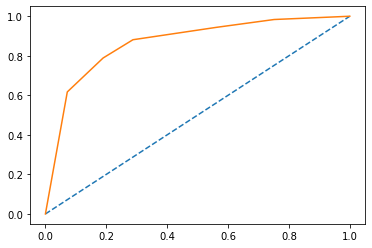

In [254]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

###### Applying Grid Search CV on KNN Model

In [255]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train) #scaling the data since KNN is a distance based algorithm.
X_test_scaled=ss.transform(X_test)
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [256]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [257]:
# defining parameter range
grid = GridSearchCV(KNN_model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_test_scaled, y_test)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [258]:
print(grid_search.best_params_)

{'n_neighbors': 11}


In [259]:
accuracy = grid_search.best_score_ *100

print("Accuracy is : {:.2f}%".format(accuracy))

Accuracy is : 83.55%


###### Also using grid search cv or without using grid search cv on KNN model Accuracy Score is alsmost similar on the test data.

###### Bagging using Random Forest Classifier

In [260]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

###### Accuracy, Confusion matrix and Classification report on Bagging train data

In [261]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[277  30]
 [  4 750]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


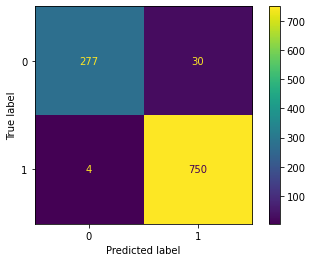

In [262]:
plot_confusion_matrix(Bagging_model,X_train,y_train);

###### Accuracy, Confusion matrix and Classification report on Bagging test data

In [263]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


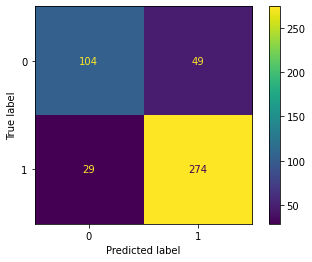

In [264]:
plot_confusion_matrix(Bagging_model,X_test,y_test);

###### AUC and ROC on Bagging train data

AUC: 0.997


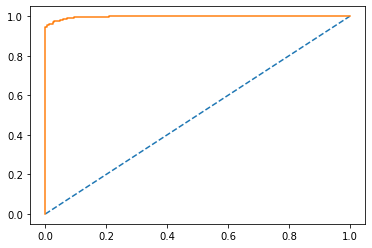

In [265]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bgg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bgg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

###### AUC and ROC on Bagging test data

AUC: 0.897


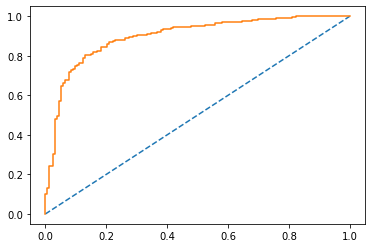

In [266]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bgg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bgg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

###### Applying Grid Search CV on Bagging

In [267]:
param_grid = {
    'base_estimator__max_depth' : [3, 4, 5],
    'max_samples' : [0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(RandomForestClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, cv = 10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [3, 4, 5],
                         'max_samples': [0.1, 0.2, 0.5]})

In [268]:
print(clf.best_params_)
best_clf = clf.best_estimator_
best_clf

{'base_estimator__max_depth': 5, 'max_samples': 0.5}


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5),
                  max_features=0.5, max_samples=0.5, n_estimators=100)

In [269]:
print(best_clf.score(X_test, y_test))

0.8048245614035088


###### Also for Bagging using grid search or without using grid search cv accuracy score remains same for test data.

###### Boosting
Ada Boost

In [270]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

###### Accuracy, Confusion matrix and Classification report for train data

In [271]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


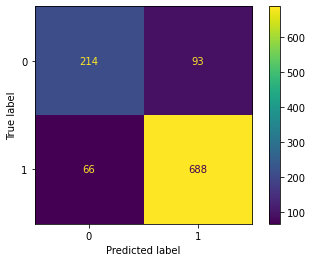

In [272]:
plot_confusion_matrix(ADB_model,X_train,y_train);

###### Accuracy, Confusion matrix and Classification report for test data

In [273]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


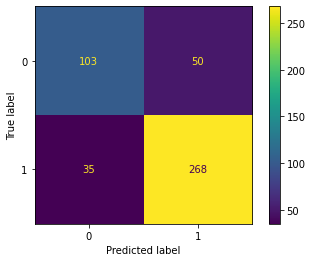

In [274]:
plot_confusion_matrix(ADB_model,X_test,y_test);

###### AUC and ROC curve for train data

AUC: 0.915


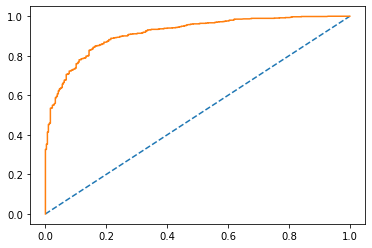

In [275]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

###### AUC and ROC curve for test data

AUC: 0.877


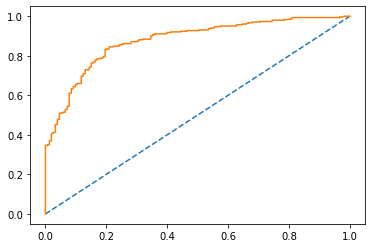

In [276]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

###### Applying Grid search cv on Ada Boosting

In [277]:
from sklearn.model_selection import GridSearchCV

ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1)

In [278]:
search.fit(X,y)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000}

In [283]:
search.best_score_

0.875

###### Gradient Boosting

In [284]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

###### Accuracy, Confusion matrix and Classification report on train data

In [285]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


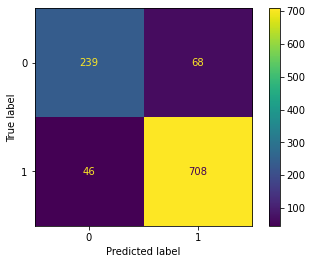

In [286]:
plot_confusion_matrix(gbcl,X_train,y_train);

###### Accuracy, Confusion matrix and Classification report on test data

In [287]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



C:\Users\swetha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


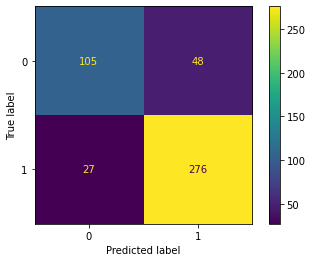

In [288]:
plot_confusion_matrix(gbcl,X_test,y_test);

###### AUC and ROC curve for train data

AUC: 0.951


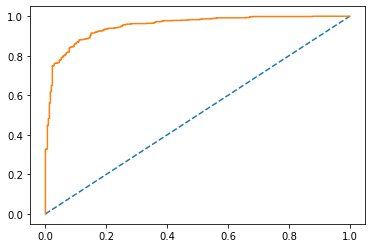

In [289]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

###### AUC and ROC curve for test data

AUC: 0.899


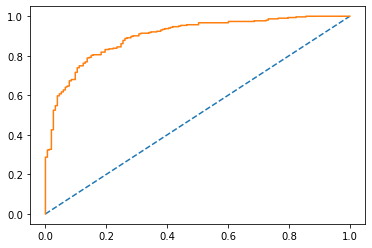

In [290]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

###### Applying Grid search CV on Gradient Boosting

In [291]:
from sklearn.model_selection import GridSearchCV

In [292]:
GB = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
GB.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM : {:.3f}'.format(GB.score(X_test, y_test)))

Accuracy of the GBM : 0.840
